In [ ]:
#| default_exp PCA

# PCA Analysis

> PCA detail walkthrough with help of MNIST Data Set


[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1EaEP81TkXqj4X68lBKN6Guoj6DFrlrAH#scrollTo=ee5abbdb)

<!-- [![](https://www.google.com/images/branding/googlelogo/1x/googlelogo_color_92x30dp.png)](https://www.google.com) -->

[View Source Code](https://github.com/Hemanth-Thaluru/sdm_class_prj/blob/main/nbs/PCA.ipynb) | 
[View Slides](https://www.buffalo.edu/) | 
[Watch Video Walkthrough](https://www.buffalo.edu/) 

## Why PCA

> Dimensionality reduction : Reduces variables.

> Feature extraction : Identifies Important features

> Data visualization : Turns into 2 or 3d features

> Noise reduction : Reduces impact of noises

## VIsualizing with help of MNIST

###  What is MNIST

MNIST is a simple computer vision dataset. It consists of 28x28 pixel images of handwritten digits, such as:

Every MNIST data point, every image, can be thought of as an array of numbers describing how dark each pixel is. For example, we might think of  as something like:

Since each image has 28 by 28 pixels, we get a 28x28 array. We can flatten each array into a 28∗28=784
 dimensional vector. Each component of the vector is a value between zero and one describing the intensity of the pixel. Thus, we generally think of MNIST as being a collection of 784-dimensional vectors.

> While the MNIST data points are embedded in 784-dimensional space, they live in a very small subspace. With some slightly harder arguments, we can see that they occupy a lower dimensional subspace.

### Downloading MNIST Dataset

In [ ]:
from pathlib import Path
import os
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from keras.datasets import mnist # MNIST dataset is included in Keras

In [ ]:
# The MNIST data is split between 60,000 training images and 10,000 test image
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)

X_train shape (60000, 28, 28)


### Visualize Train Data

> Lets us first see our train data

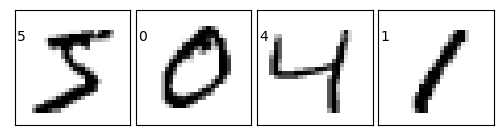

In [ ]:
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(4):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(y_train[i]))

In [ ]:
#| hide
compe='digit-recognizer'
iskaggle= os.environ.get('KAGGLE_KERNEL_RUNTYPE','')
if iskaggle:
    path=Path(f'../input/{compe}')
    ! pip install -Uqq fastai
else:
    import kaggle,zipfile
    path=Path(f'{compe}')
    if not path.exists():
        kaggle.api.competition_download_cli(str(path))
        zipfile.ZipFile(f'{path}.zip').extractall(path)

### Reading the data using pandas

In [ ]:
data = pd.read_csv(f'{compe}/train.csv')
data.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(f'Shape of the data:{data.shape}')

Shape of the data:(42000, 785)


In [ ]:
labels = data['label']
features = data.drop('label',axis =1)
print(f'Shape of features:{features.shape}')

Shape of features:(42000, 784)


### Making Covariance matrix

In [ ]:
standarized_data = StandardScaler().fit_transform(features)
covar_mat = np.matmul(standarized_data.T,standarized_data)
print(f'Shape of covariance matrix:{covar_mat.shape}')

Shape of covariance matrix:(784, 784)


In [ ]:
values, vectors = eigh(covar_mat,eigvals = (782,783))
vectors = vectors.T
print(f'Shape of Vectors : {vectors.shape}') 

Shape of Vectors : (2, 784)


In [ ]:
new_cords = np.matmul(vectors,features.T)
print(f'Shape of Vectors : {new_cords.shape}')     

Shape of Vectors : (2, 42000)


In [ ]:
new_cordinates = np.vstack((new_cords,labels)).T
df = pd.DataFrame(data=new_cordinates,columns = ('p0','p1','labels'))
df.head(2)

,p0,p1,labels
0,-540.331669,122.904004,1.0
1,339.624235,2318.125463,0.0


### VIsualizing principal features

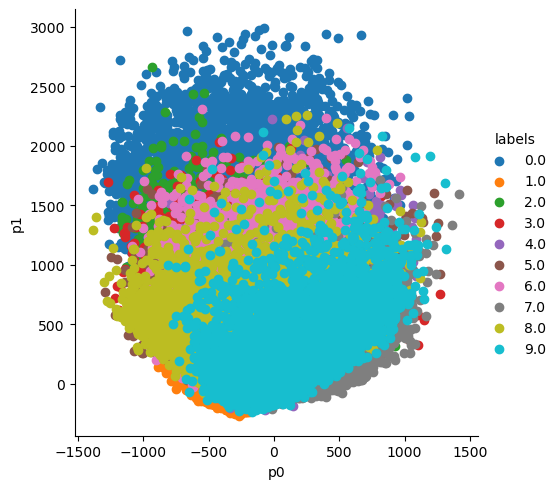

In [ ]:
sns.FacetGrid(df,hue='labels',height = 5).map(plt.scatter,'p0','p1').add_legend()
plt.show()

## Extra Resources for PCA

> **For visualization use this colah beautiful site** : [Colah Website](https://colah.github.io/posts/2014-10-Visualizing-MNIST/)

> **For Visulazation of MNIST** : [ML Addict](https://setosa.io/ev/principal-component-analysis/)

> **Next advancement to PCA -> T-SNE** : [Distil Pub](https://distill.pub/2016/misread-tsne/)

> **Understanding Principal Component Analysis** :  [Medium Blog](https://medium.com/@aptrishu/understanding-principle-component-analysis-e32be0253ef0)

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()